In [ ]:
# ==============================
# Experiment 5: House Price Prediction
# ==============================

# Step 1: Load dataset
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers




In [ ]:
# Load Boston Housing dataset from Keras
# (train/test split provided by Keras)
(train_data, train_targets), (test_data, test_targets) = keras.datasets.boston_housing.load_data()

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (404, 13)
Testing data shape: (102, 13)


In [ ]:
# Step 2: Normalize input features
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [ ]:
# Step 3: Build a function to design the network
def build_model():
    model = keras.Sequential()
    model.add(layers.Dense(64, activation="relu", input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(1))  # Linear output for regression
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [ ]:
# Step 4 & 5: Apply K-fold cross validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_mae_histories = []

for i in range(k):
    print(f"Processing fold #{i+1}")

    # Validation data for this fold
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Training data for this fold
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],
        axis=0
    )

    # Build model
    model = build_model()

    # Train
    history = model.fit(
        partial_train_data, partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=1, verbose=0
    )

    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)


Processing fold #1
Processing fold #2
Processing fold #3
Processing fold #4


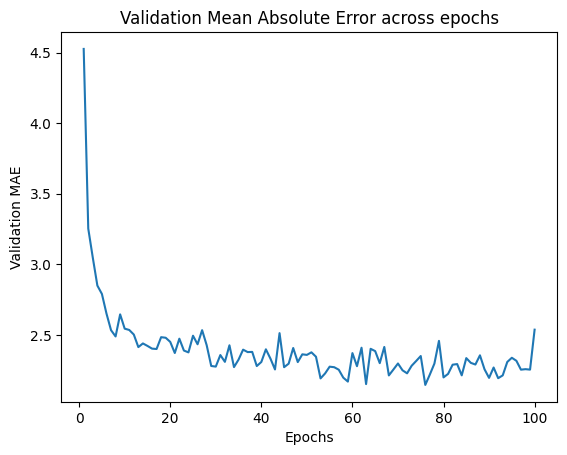

In [ ]:

# Step 6: Compute average of K-fold validation scores
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

# Step 7: Plot validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.title("Validation Mean Absolute Error across epochs")
plt.show()